In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# List of stock tickers
tickers = ['BWEN', 'STGW', 'PLTK']

# Create an empty DataFrame to hold the stock data
stock_data = pd.DataFrame()

# Fetch and analyze stock data for each ticker
for ticker in tickers:
    # Download historical data
    stock = yf.Ticker(ticker)
    hist_data = stock.history(period="5y")
    
    # Calculate 14-day RSI
    delta = hist_data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    # Add RSI to historical data
    hist_data['RSI'] = rsi
    
    # Append data to the main DataFrame
    hist_data['Ticker'] = ticker
    stock_data = stock_data.append(hist_data)

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/3605216370.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/3605216370.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/3605216370.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(hist_data)


In [ ]:
"""
competitors for Broadwind:
TechPrecision (TPCS), Molekule Group (MKUL), Research Solutions (RSSS), Pioneer Power Solutions (PPSI), Ampco-Pittsburgh (AP), Advanced Emissions Solutions (ADES), Ideal Power (IPWR), Perma-Pipe International (PPIH), Wrap Technologies (WRAP), and Taylor Devices (TAYD)

competitors for Broadwind: sector: "business services"
NV5 Global (NVEE), B. Riley Financial (RILY), Inter & Co, Inc. (INTR), Thoughtworks (TWKS), V2X (VVX), HNI (HNI), Bitdeer Technologies Group (BTDR), Cellebrite DI (CLBT), MeridianLink (MLNK), and Veradigm (MDRX).



"""

In [2]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,Ticker
Date,,,,,,,,,
2018-08-20 00:00:00-04:00,2.11,2.200,2.110,2.16,11000,0.0,0.0,NaN,BWEN
2018-08-21 00:00:00-04:00,2.19,2.250,2.110,2.15,27000,0.0,0.0,NaN,BWEN
2018-08-22 00:00:00-04:00,2.14,2.220,2.110,2.11,36900,0.0,0.0,NaN,BWEN
2018-08-23 00:00:00-04:00,2.13,2.180,2.080,2.09,56600,0.0,0.0,NaN,BWEN
2018-08-24 00:00:00-04:00,2.09,2.130,2.060,2.08,34200,0.0,0.0,NaN,BWEN
...,...,...,...,...,...,...,...,...,...
2023-08-14 00:00:00-04:00,9.77,9.965,9.665,9.95,1629800,0.0,0.0,9.215002,PLTK
2023-08-15 00:00:00-04:00,9.87,9.900,9.645,9.74,1081800,0.0,0.0,8.823515,PLTK
2023-08-16 00:00:00-04:00,9.70,9.840,9.660,9.81,864400,0.0,0.0,11.074925,PLTK


In [3]:
def basic_metrics(stock_data):
    # Calculate the 50-day moving average
    stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()

    # Calculate the 200-day moving average
    stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()
    
    stock_data['50_SMA'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['200_SMA'] = stock_data['Close'].rolling(window=200).mean()
    
    # Calculating 50-day Exponential Moving Average
    stock_data['50_EMA'] = stock_data['Close'].ewm(span=50, adjust=False).mean()

    # Calculating 200-day Exponential Moving Average
    stock_data['200_EMA'] = stock_data['Close'].ewm(span=200, adjust=False).mean()

    # Calculate daily returns
    stock_data['Daily_Returns'] = stock_data['Close'].pct_change()

    # Calculate volatility (30-day standard deviation of daily returns)
    stock_data['Volatility'] = stock_data['Daily_Returns'].rolling(window=30).std()

    # Calculate Sharpe Ratio (assuming 0% risk-free rate)
    stock_data['Sharpe_Ratio'] = stock_data['Daily_Returns'].mean() / stock_data['Daily_Returns'].std()
    
    return stock_data

In [4]:
df = pd.DataFrame()
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    df_temp = basic_metrics(df_temp)
    df = df.append(df_temp)
    
stock_data = df

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1073647460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1073647460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1073647460.py:8: SettingWithCopyWarning: 
A value is 

In [5]:
def plots(stock_data, ticker):   
    # Plotting
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 20))

    # Plot stock prices and moving averages
    ax1.plot(stock_data['Close'], label='Stock Price', color='blue')
    ax1.plot(stock_data['50_MA'], label='50-day MA', color='green')
    ax1.plot(stock_data['200_MA'], label='200-day MA', color='red')
    ax1.set_title(f'Stock Price and Moving Averages for {ticker}')
    ax1.set_xlabel('Days')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # Plot daily returns
    ax2.plot(stock_data['Daily_Returns'], label='Daily Returns', color='purple')
    ax2.set_title(f'Daily Returns for {ticker}')
    ax2.set_xlabel('Days')
    ax2.set_ylabel('Daily Returns')
    ax2.legend()
    ax2.grid(True)

    # Plot volatility
    ax3.plot(stock_data['Volatility'], label='Volatility (30-day)', color='orange')
    ax3.set_title(f'Volatility for {ticker}')
    ax3.set_xlabel('Days')
    ax3.set_ylabel('Volatility')
    ax3.legend()
    ax3.grid(True)

    # Plot Sharpe Ratio
    ax4.axhline(stock_data['Sharpe_Ratio'].mean(), color='brown', linestyle='--', label='Sharpe Ratio')
    ax4.set_title(f'Sharpe Ratio for {ticker}')
    ax4.set_xlabel('Days')
    ax4.set_ylabel('Sharpe Ratio')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

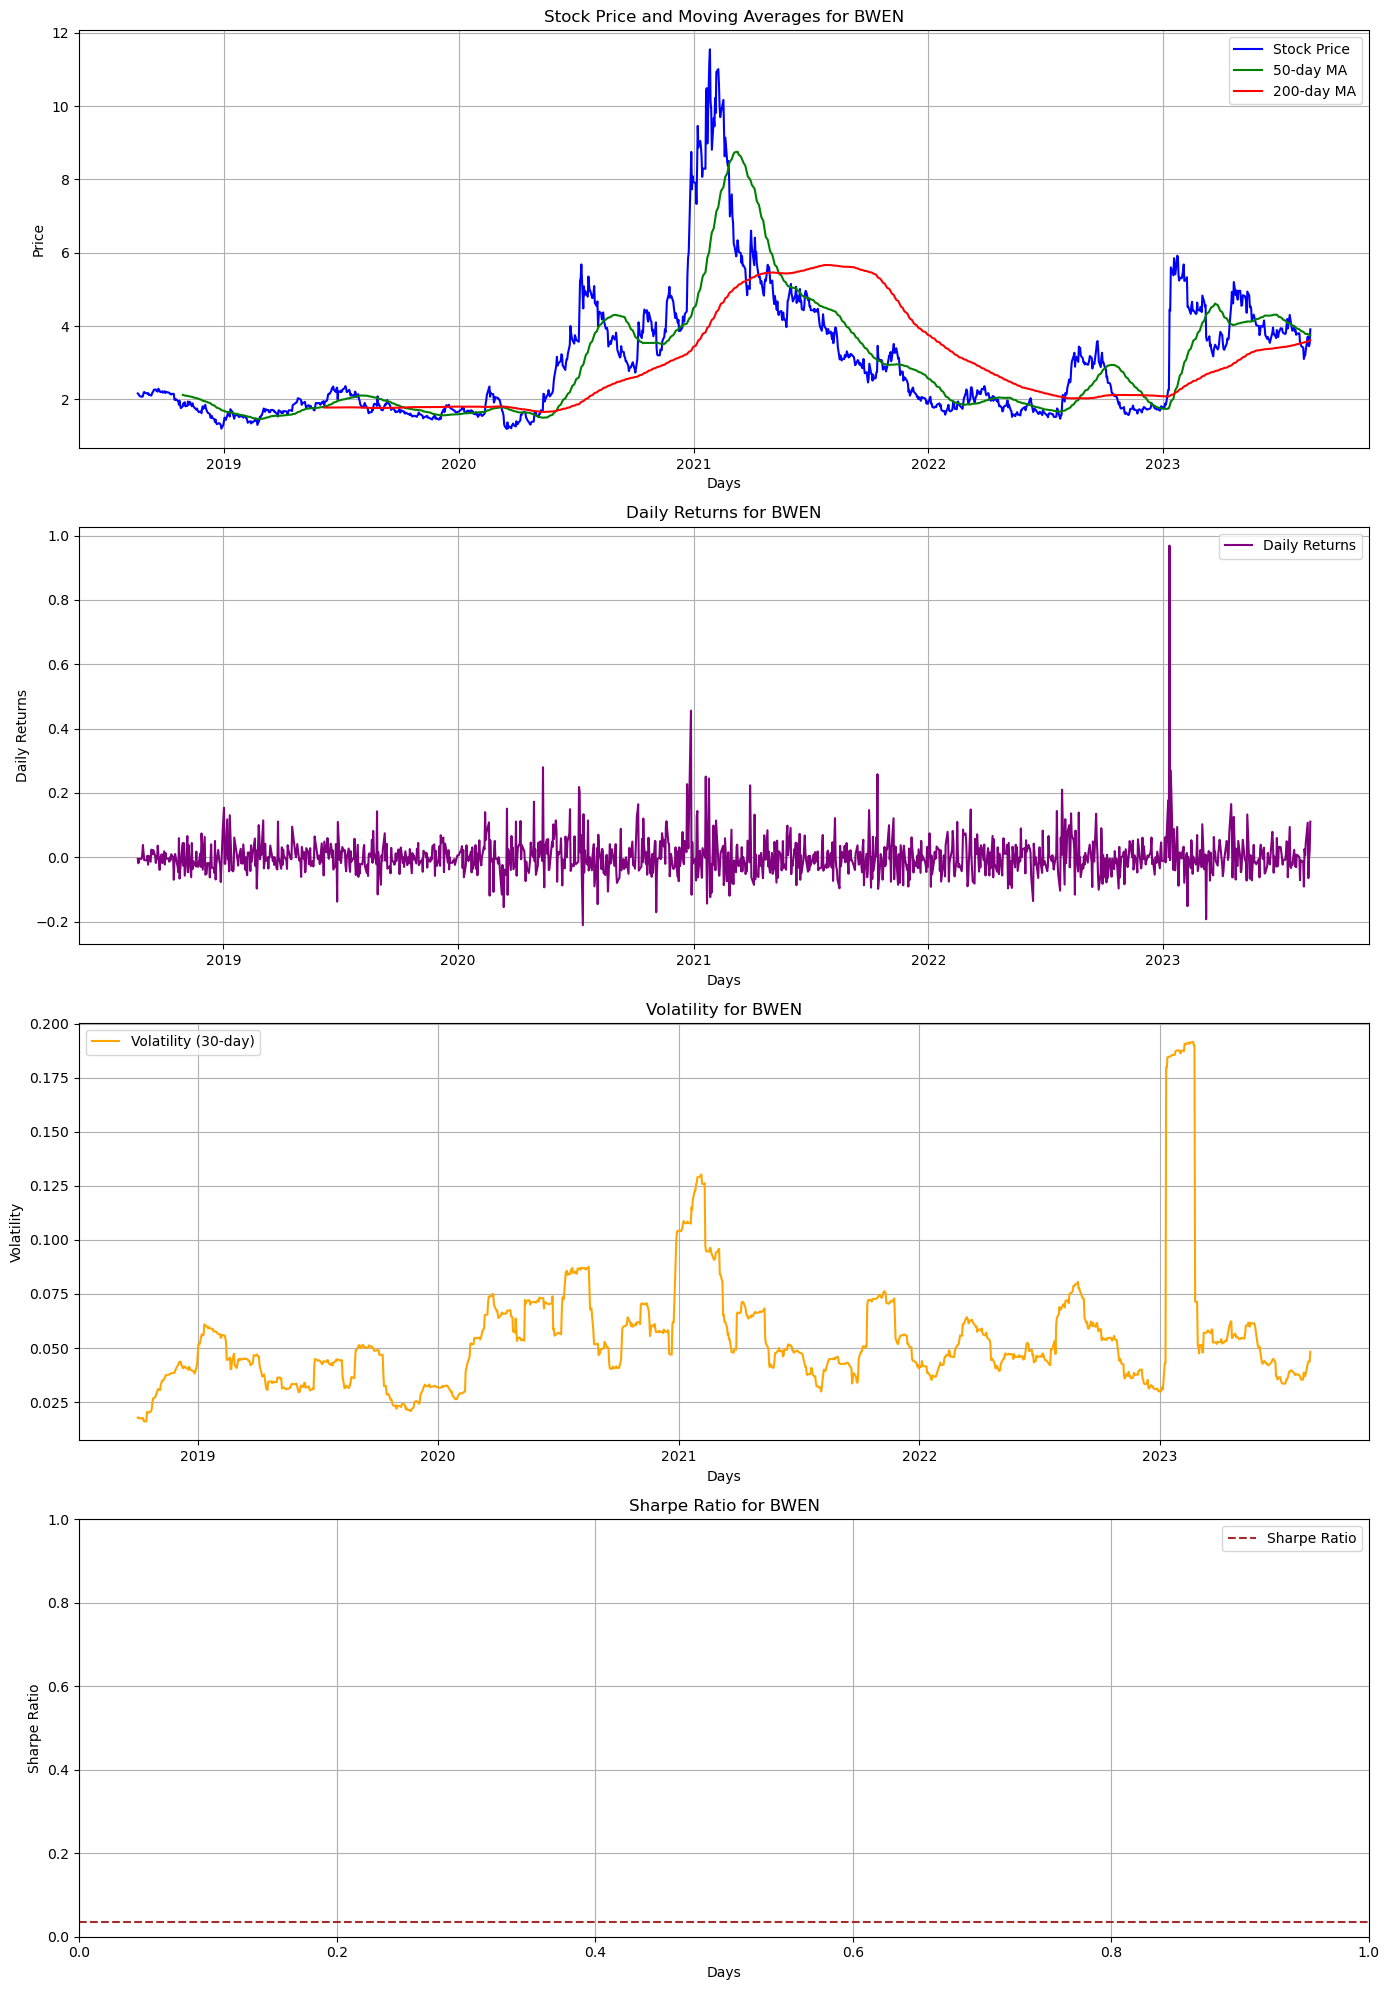

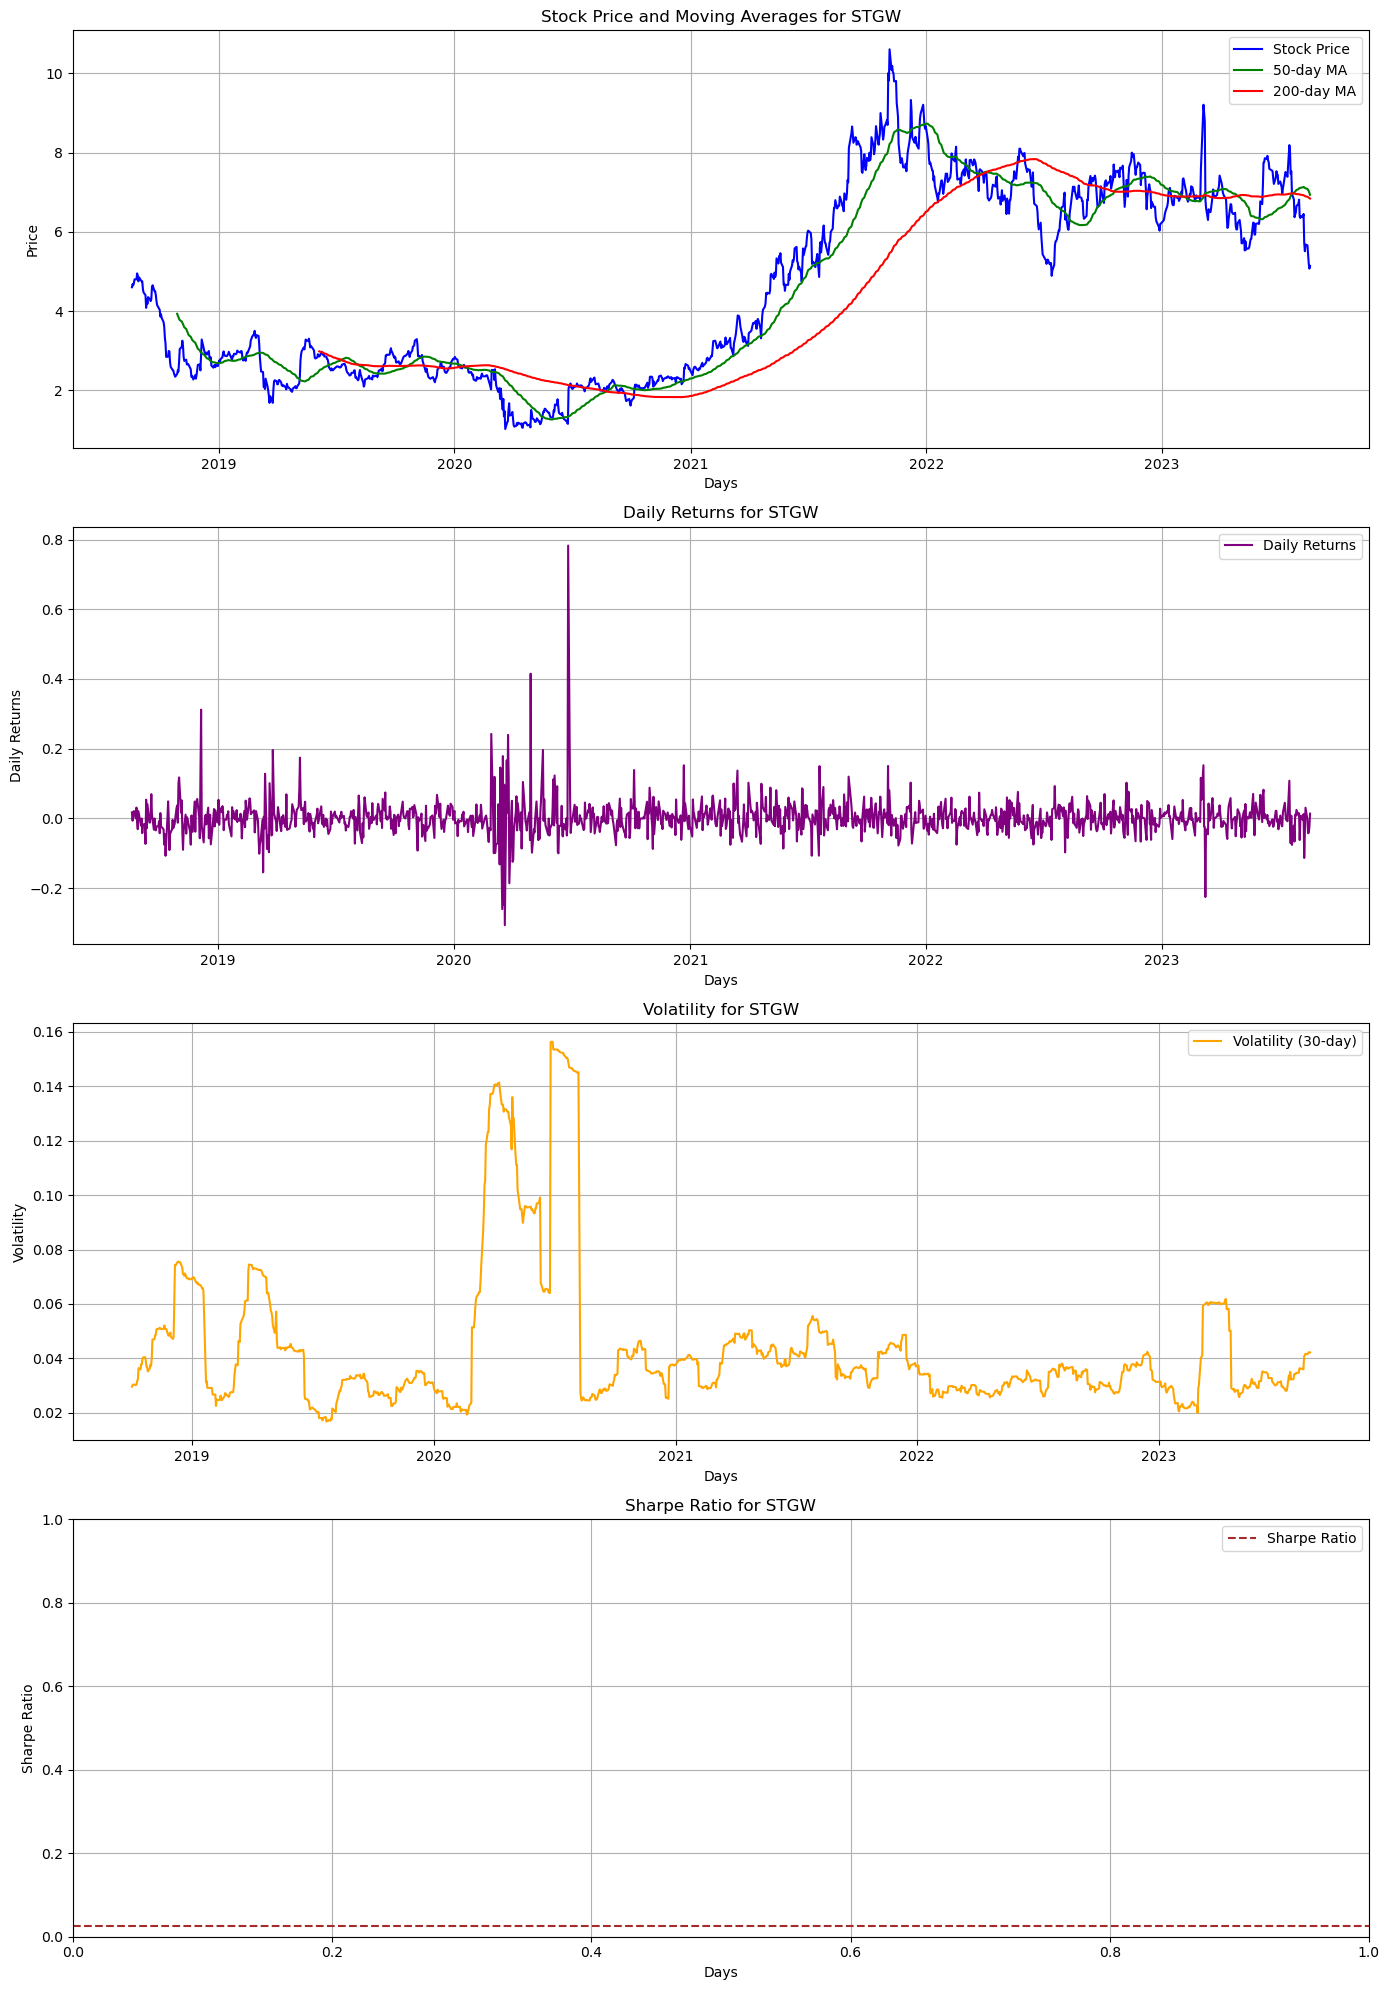

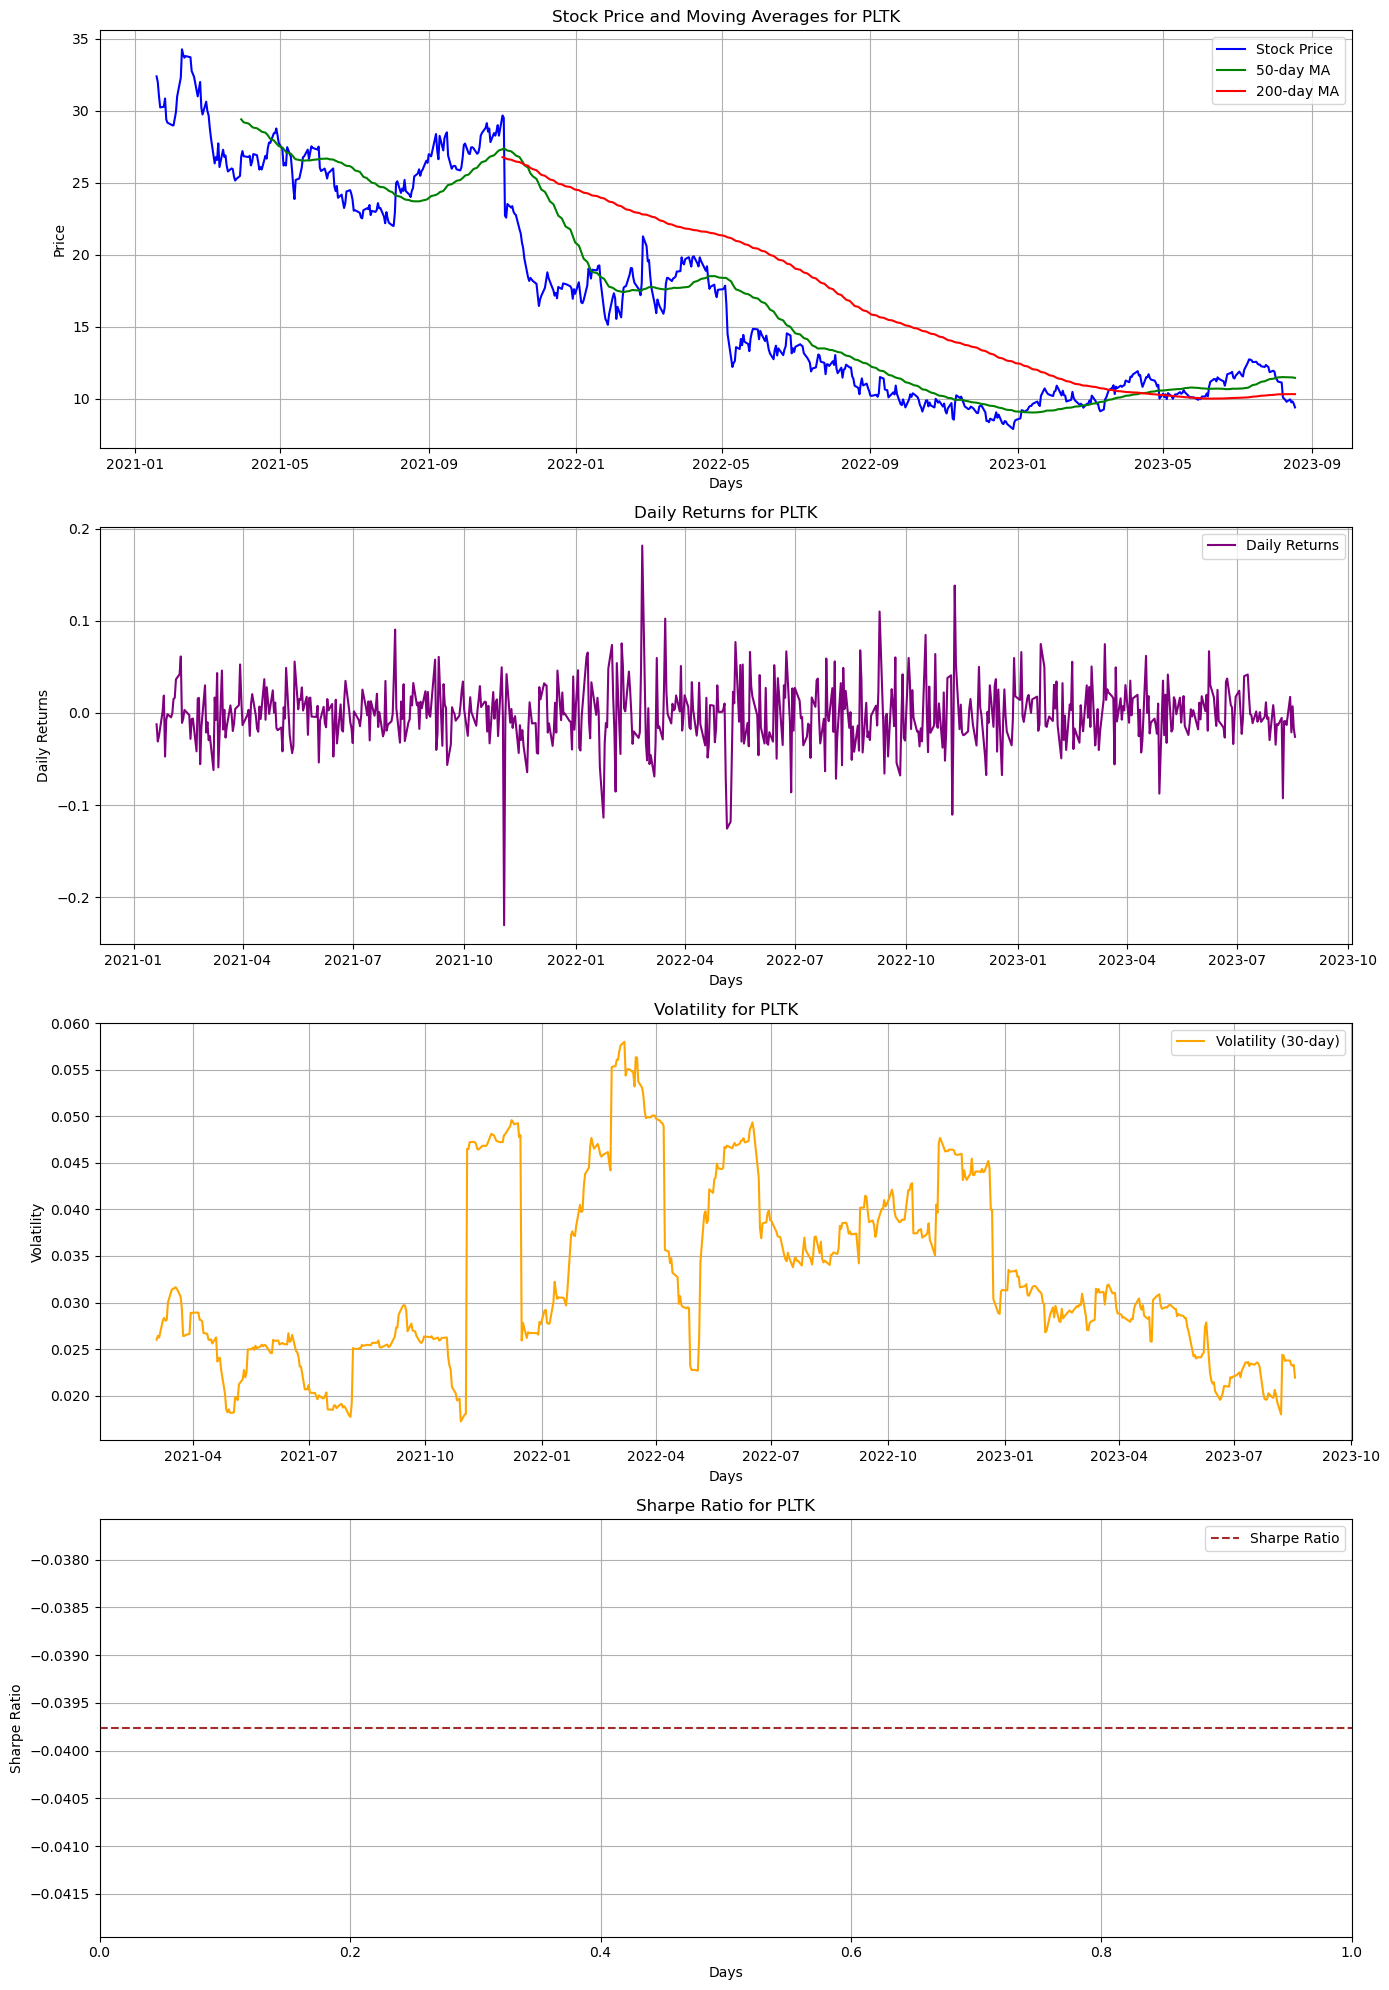

In [6]:
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    plots(df_temp, ticker)

In [7]:
def plots_moving_averages(stock_data, ticker):   
    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(stock_data['Close'], label='Stock Price', color='blue')
    plt.plot(stock_data['50_SMA'], label='50-day SMA', color='green')
    plt.plot(stock_data['200_SMA'], label='200-day SMA', color='red')
    plt.title(f'Stock Price and Moving Averages for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


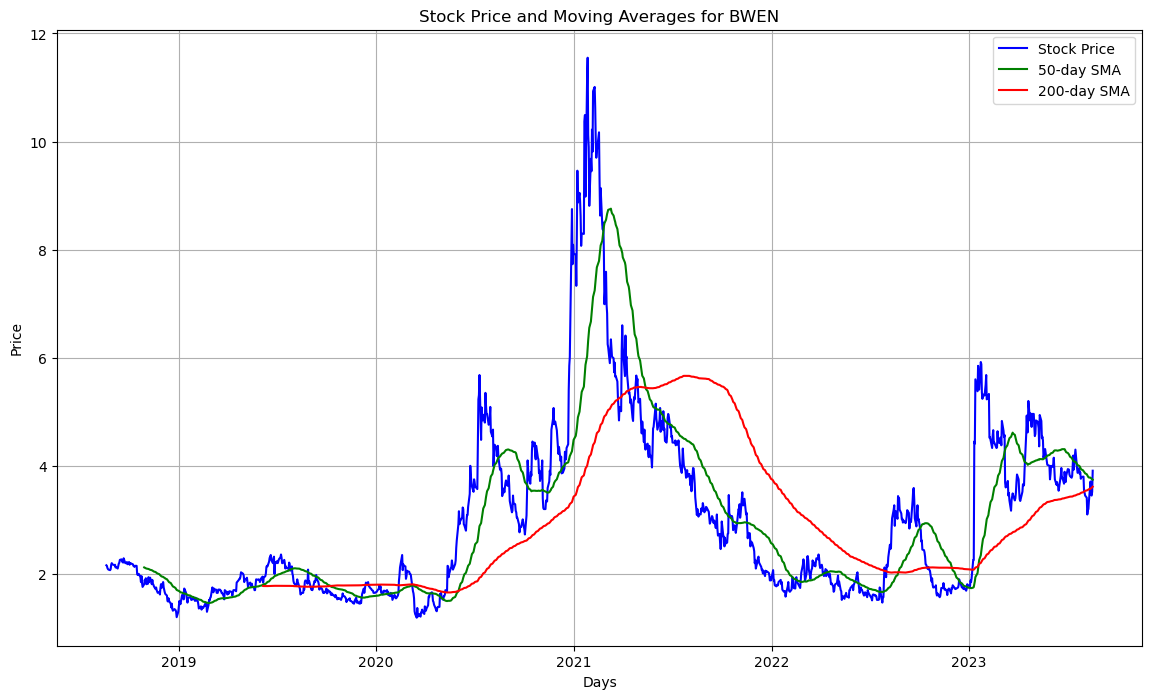

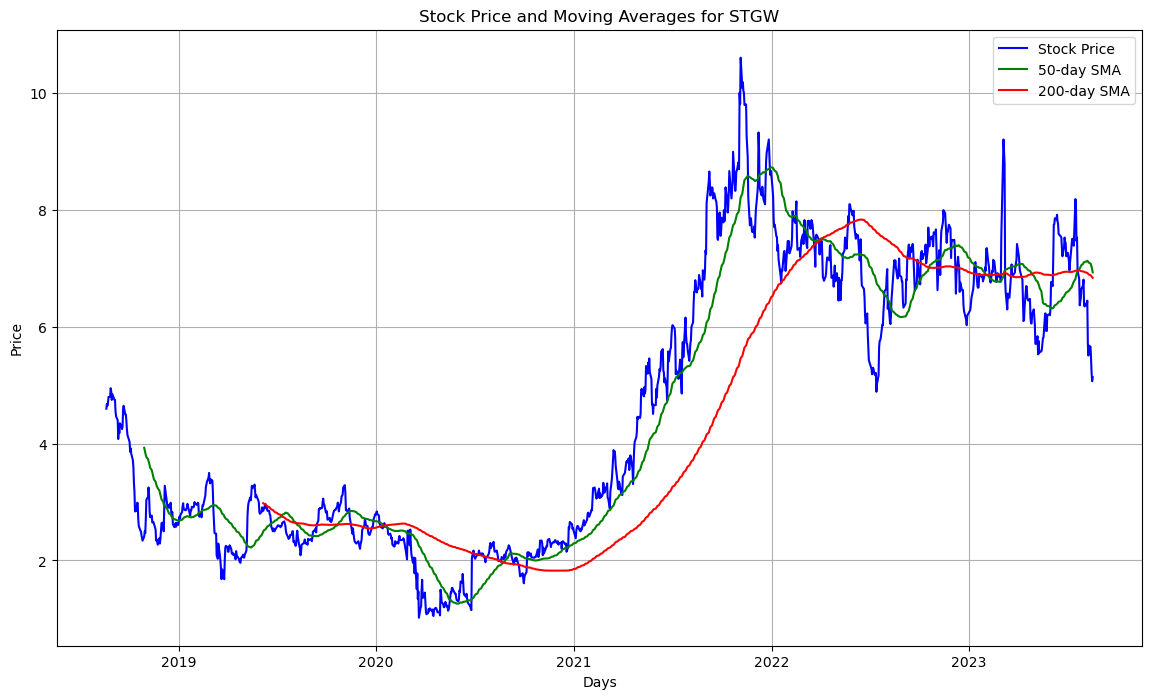

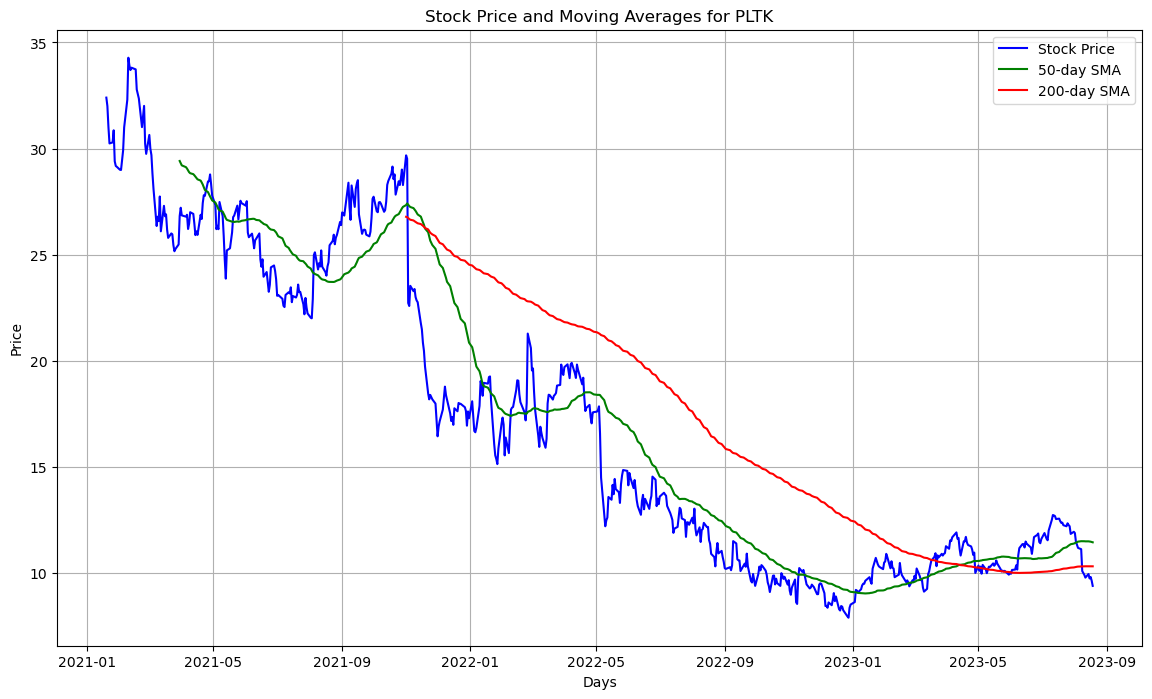

In [8]:
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    plots_moving_averages(df_temp, ticker)

In [11]:
def momentum_indicators(stock_data):
    # Calculate RSI
    delta = stock_data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))

    # Calculate MACD
    stock_data['12_EMA'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
    stock_data['26_EMA'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
    stock_data['MACD'] = stock_data['12_EMA'] - stock_data['26_EMA']

    # Calculate Stochastic Oscillator
    low_14 = stock_data['Close'].rolling(window=14).min()
    high_14 = stock_data['Close'].rolling(window=14).max()
    stock_data['Stochastic_Oscillator'] = 100 * (stock_data['Close'] - low_14) / (high_14 - low_14)
    
    return stock_data

In [14]:
df = pd.DataFrame()
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    df_temp = momentum_indicators(df_temp)
    df = df.append(df_temp)
    
stock_data = df

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1487074525.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI'] = 100 - (100 / (1 + rs))
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1487074525.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['12_EMA'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/1487074525.py:11: SettingWithCopyWarning: 
A value is trying to be set

In [15]:
def plots_momentum_indicators(stock_data, ticker):
    # Plotting
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 20))

    # Plot stock prices
    ax1.plot(stock_data['Close'], label='Stock Price', color='blue')
    ax1.set_title(f'Stock Price for {ticker}')
    ax1.set_xlabel('Days')
    ax1.set_ylabel('Price')
    ax1.legend()
    ax1.grid(True)

    # Plot RSI
    ax2.plot(stock_data['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--')
    ax2.axhline(30, color='green', linestyle='--')
    ax2.set_title(f'Relative Strength Index (RSI) for {ticker}')
    ax2.set_xlabel('Days')
    ax2.set_ylabel('RSI')
    ax2.legend()
    ax2.grid(True)

    # Plot MACD
    ax3.plot(stock_data['MACD'], label='MACD', color='orange')
    ax3.axhline(0, color='black', linestyle='--')
    ax3.set_title(f'Moving Average Convergence Divergence (MACD) for {ticker}')
    ax3.set_xlabel('Days')
    ax3.set_ylabel('MACD')
    ax3.legend()
    ax3.grid(True)

    # Plot Stochastic Oscillator
    ax4.plot(stock_data['Stochastic_Oscillator'], label='Stochastic Oscillator', color='brown')
    ax4.axhline(80, color='red', linestyle='--')
    ax4.axhline(20, color='green', linestyle='--')
    ax4.set_title(f'Stochastic Oscillator for {ticker}')
    ax4.set_xlabel('Days')
    ax4.set_ylabel('Stochastic Oscillator')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

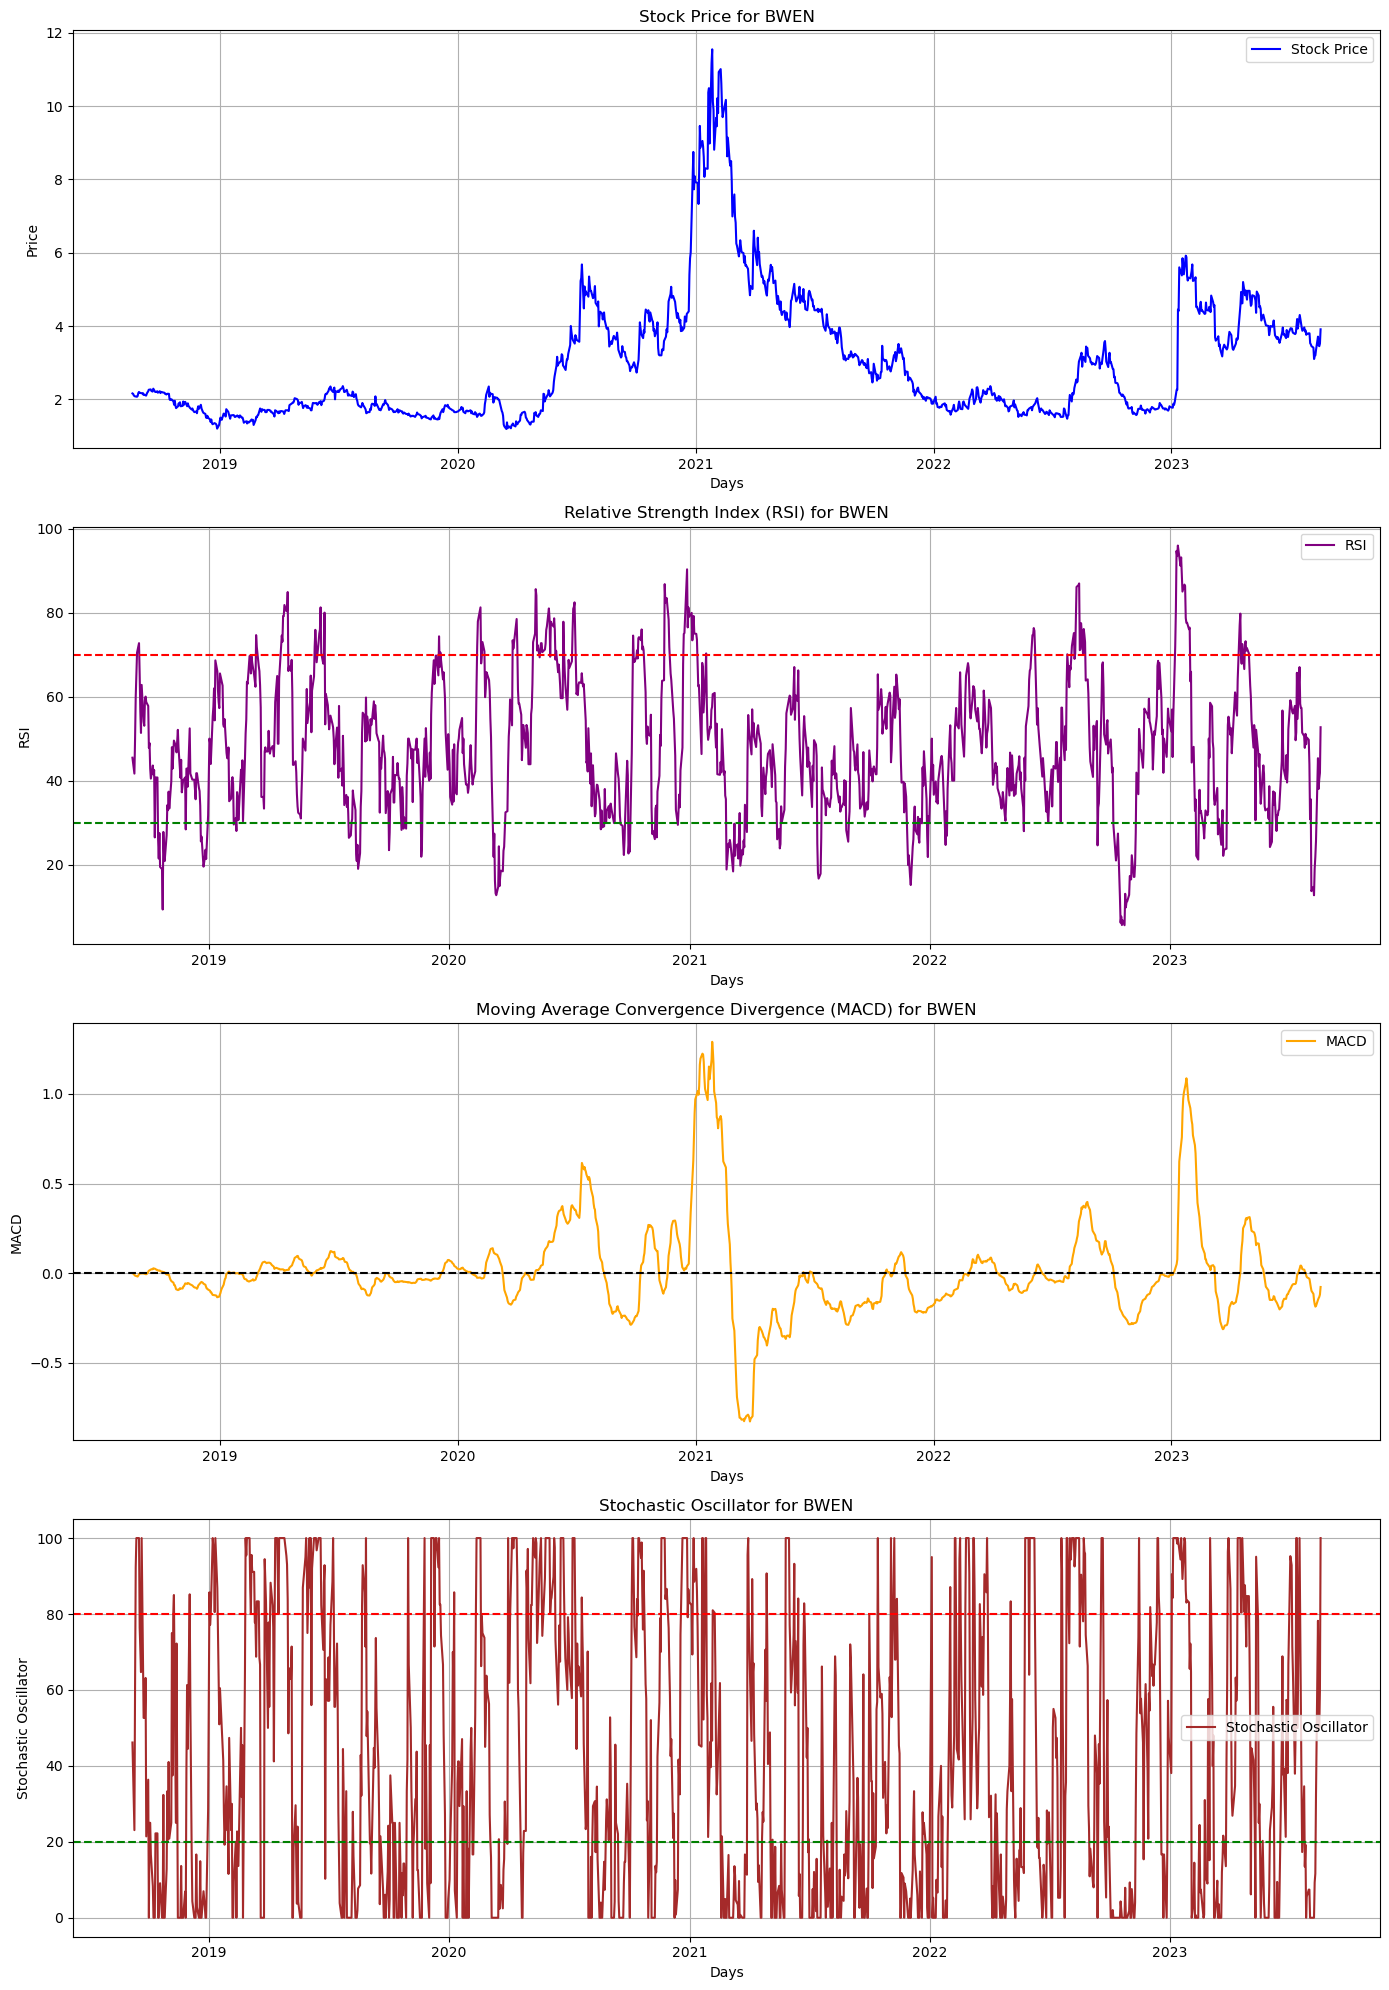

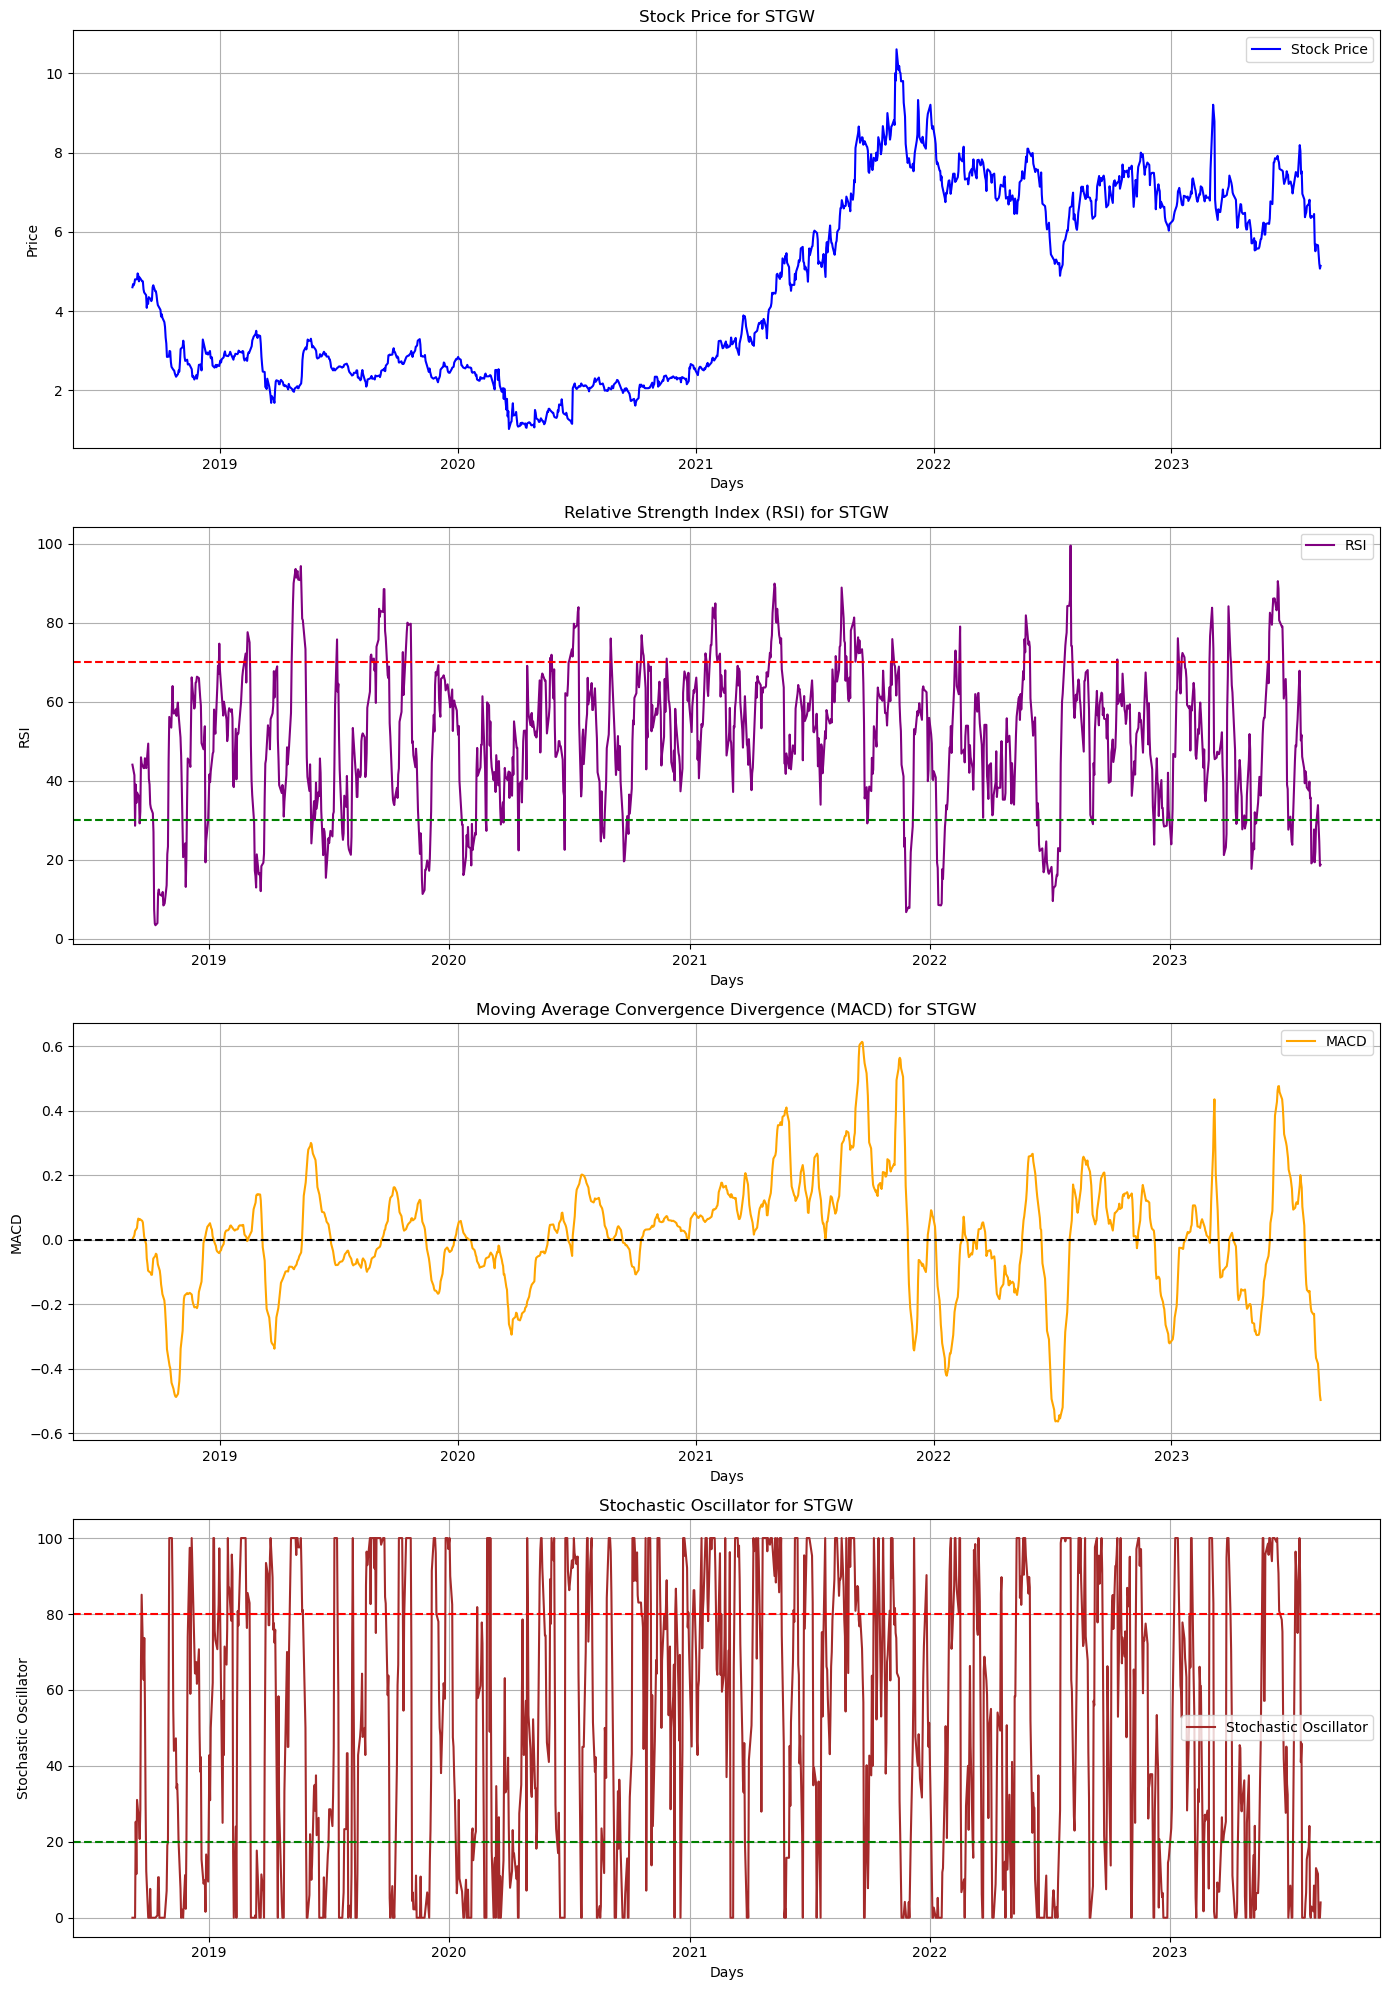

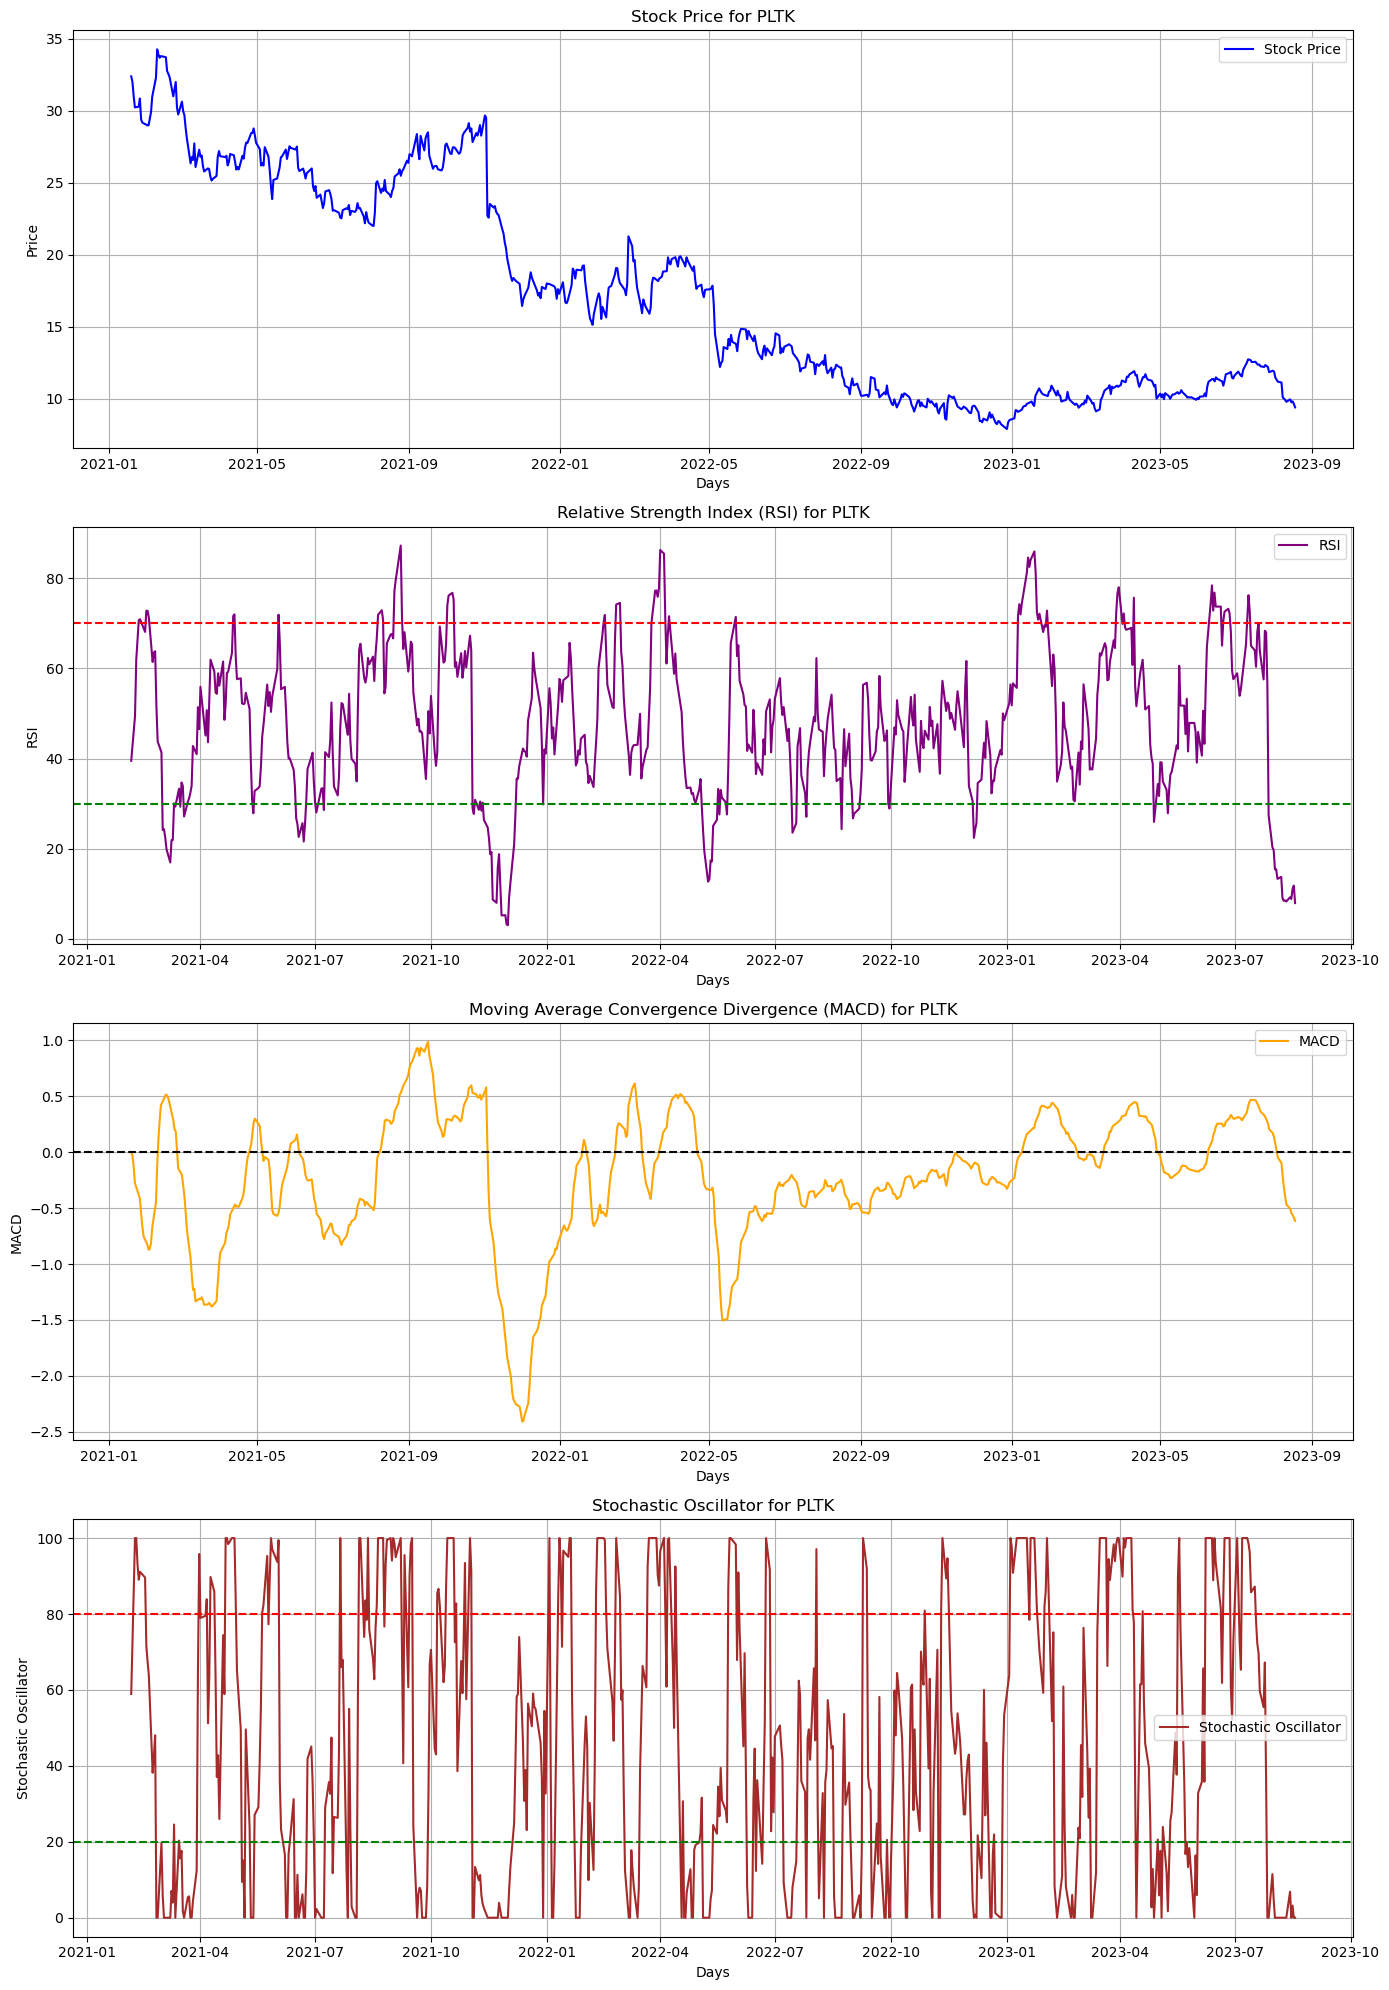

In [16]:
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    plots_momentum_indicators(df_temp, ticker)

In [23]:
def calculate_bollinger_bands(df, close_column='Close', n_periods=20, k_std_dev=2):
    """
    Calculate Bollinger Bands for a DataFrame.
    
    Parameters:
    - df: DataFrame containing the stock data
    - close_column: Column name for the 'Close' prices
    - n_periods: Number of periods for SMA and standard deviation
    - k_std_dev: Number of standard deviations for the upper and lower bands
    
    Returns:
    - DataFrame with added 'Middle_Band', 'Upper_Band', and 'Lower_Band' columns
    """
    
    # Make a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()
    
    # Calculate the SMA (Middle Band)
    df_copy['Middle_Band'] = df_copy[close_column].rolling(window=n_periods).mean()
    
    # Calculate standard deviation
    df_copy['SD'] = df_copy[close_column].rolling(window=n_periods).std()
    
    # Calculate the Upper and Lower Bollinger Bands
    df_copy['Upper_Band'] = df_copy['Middle_Band'] + (k_std_dev * df_copy['SD'])
    df_copy['Lower_Band'] = df_copy['Middle_Band'] - (k_std_dev * df_copy['SD'])
    
    return df_copy


In [24]:
df = pd.DataFrame()
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    df_temp = calculate_bollinger_bands(df_temp)
    df = df.append(df_temp)
    
stock_data = df

/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/495779580.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/495779580.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)
/var/folders/_8/pmt00p0n2zsgw2rvt0djf05m0000gp/T/ipykernel_91721/495779580.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


In [27]:
def bollinger_band(stock_data, ticker):

    # Plotting
    plt.figure(figsize=(14, 8))

    # Plot stock prices
    plt.plot(stock_data['Close'], label='Stock Price', color='blue')

    # Plot Bollinger Bands
    plt.plot(stock_data['Middle_Band'], label='Middle Band (20-day SMA)', color='purple')
    plt.plot(stock_data['Upper_Band'], label='Upper Band', color='red')
    plt.plot(stock_data['Lower_Band'], label='Lower Band', color='green')

    plt.title(f'Stock Price and Bollinger Bands for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


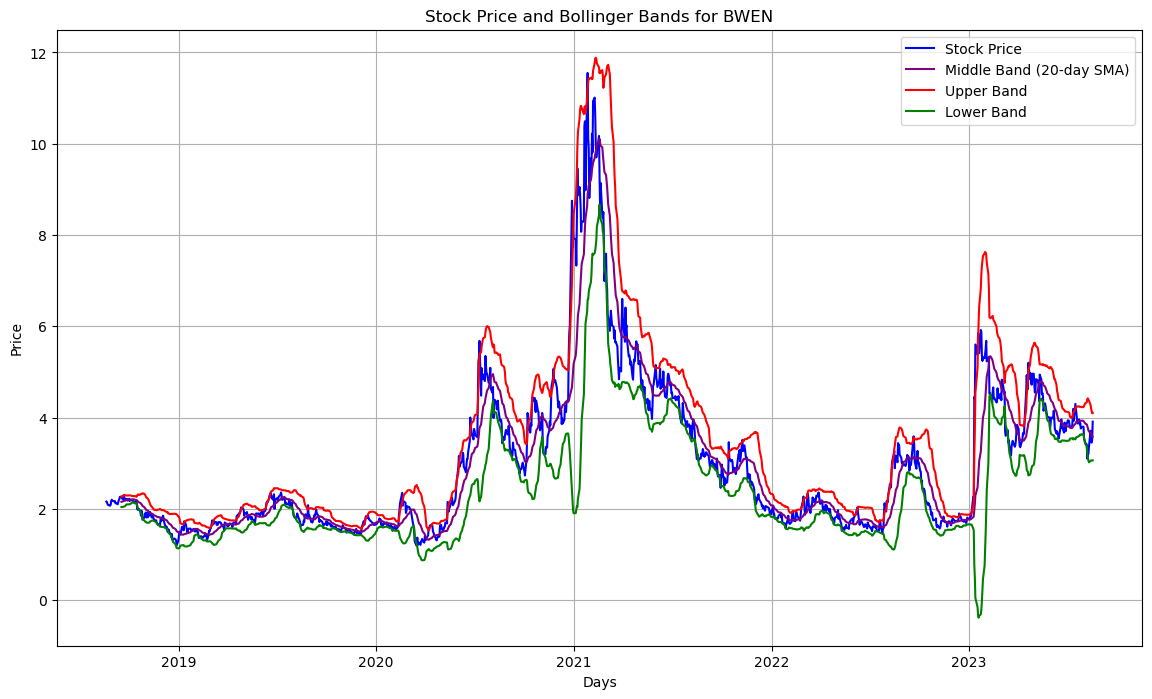

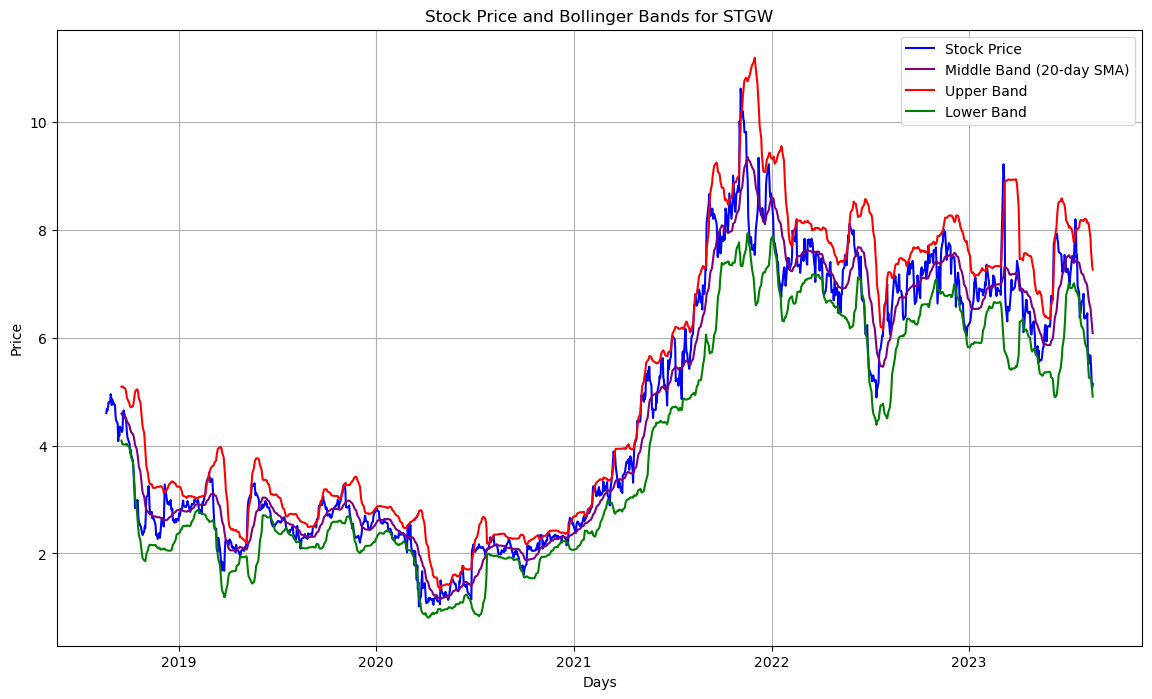

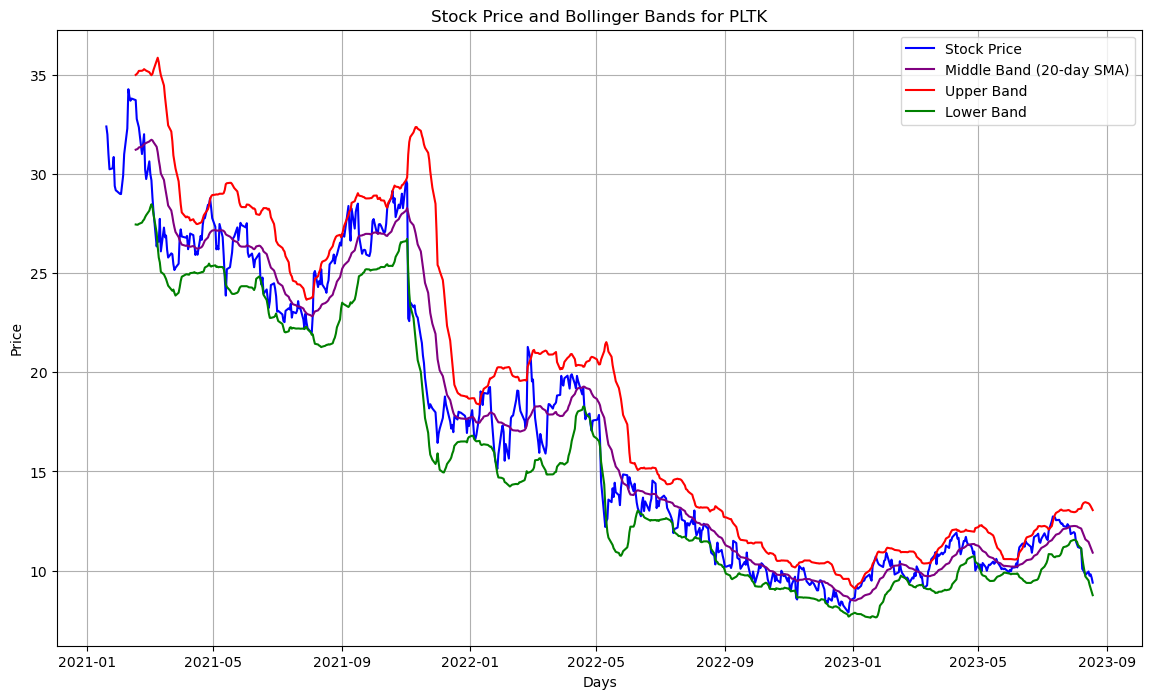

In [28]:
for ticker in tickers:
    df_temp = stock_data[stock_data["Ticker"]==ticker]
    bollinger_band(df_temp, ticker)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume stock_data is your DataFrame with 'Close' prices
# Example events (earnings announcements, product launches, etc.)
events = {
    'Earnings': [50, 150, 250, 350],
    'Product Launch': [100, 200, 300],
    'Acquisition': [75, 275]
}

# Plotting stock prices and events
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Close'], label='Stock Price', color='blue')

# Annotate events on the plot
for event, days in events.items():
    for day in days:
        plt.annotate(f"{event}", 
                     (day, stock_data['Close'].iloc[day]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', 
                     arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Stock Price and Events')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
